In [ ]:
#문자열에 특별한 규칙 있을 시 정규표현식
temp = df["Name"].map(lambda x: re.findall("[a-zA-Z]+\.", x)[0])

In [9]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20), 
 c REAL,        d INTEGER
);"""
#문자열 실수 정수
#schema 테이블의 구조

In [3]:
con = sqlite3.connect("mydata.sqlite") #mydata.sqlite라는 database가 연결 없다면 생성 후 연결
con.execute(query)
con.commit() #명령을 수행해라 <=> rollback

In [ ]:
#현실 데이터 발생 -> 저장(파일)/관리 -> 데이터베이스 -> 연결(con) -> 명령 수행(execute) ->SQL(명령어)

In [ ]:
#엑셀 파일(워크북) -> 워크시트 3개
#데이터베이스 -> 테이블

In [5]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)" #각 ?에 데이터 저장

con.executemany(stmt, data) #3번 실행
con.commit()

In [6]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [10]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [11]:
float_data.isna() #float_data에 NaN이 있냐

0    False
1    False
2     True
3    False
dtype: bool

In [12]:
float_data.isna().sum()

1

In [13]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])
string_data
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

In [14]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data
float_data.isna()

0    False
1    False
2     True
dtype: bool

In [15]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna() #NaN 제거

0    1.0
2    3.5
4    7.0
dtype: float64

In [16]:
data[data.notna()] #NaN가 아닌 것들

0    1.0
2    3.5
4    7.0
dtype: float64

In [18]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
data.dropna() #남아나는 데이터가 없어서 분석하는데 어려움이 있을 수 있으므로 사용 권장 안함

,0,1,2
0,1.0,6.5,3.0


In [20]:
data.dropna(how="all") #모든 데이터가 결측값(NaN)인 행을 제거

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [21]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [23]:
data.dropna(how="all")
data.dropna(how="all", axis='columns')
data.dropna(how="all", axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [211]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df
#데이터 분석 시 결측값을 채워넣어야 할 것을 생각해야함

,0,1,2
0,0.088005,NaN,NaN
1,1.364980,NaN,NaN
2,0.466930,NaN,-0.910866
3,2.017004,NaN,0.694347
4,-0.250540,-1.595543,-0.304736
5,0.427475,-0.914872,1.086549
6,-0.712801,0.889084,1.359756


In [26]:
df.fillna(method="bfill")

,0,1,2
0,0.385723,0.080752,0.601036
1,0.251335,0.080752,0.601036
2,-0.403638,0.080752,0.601036
3,-0.658240,0.080752,-0.599968
4,1.476713,0.080752,1.069524
5,1.273955,0.556122,-1.849728
6,-1.142358,1.102014,-0.550676


In [212]:
df

,0,1,2
0,0.088005,NaN,NaN
1,1.364980,NaN,NaN
2,0.466930,NaN,-0.910866
3,2.017004,NaN,0.694347
4,-0.250540,-1.595543,-0.304736
5,0.427475,-0.914872,1.086549
6,-0.712801,0.889084,1.359756


In [224]:
df.dropna(thresh=1) #thresh 임계값, 결측값 개수가 2개 이상인 경우에 dropna 수행 많이 사용

,0,1,2
0,0.088005,NaN,NaN
1,1.364980,NaN,NaN
2,0.466930,NaN,-0.910866
3,2.017004,NaN,0.694347
4,-0.250540,-1.595543,-0.304736
5,0.427475,-0.914872,1.086549
6,-0.712801,0.889084,1.359756


In [30]:
df=pd.read_csv('titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [35]:
df[df.Age.isna()].Fare

5       8.4583
17     13.0000
19      7.2250
26      7.2250
28      7.8792
        ...   
859     7.2292
863    69.5500
868     9.5000
878     7.8958
888    23.4500
Name: Fare, Length: 177, dtype: float64

In [36]:
df[df.Age.isna()][['Fare','Pclass']]

,Fare,Pclass
5,8.4583,3
17,13.0000,2
19,7.2250,3
26,7.2250,3
28,7.8792,3
...,...,...
859,7.2292,3
863,69.5500,3
868,9.5000,3
878,7.8958,3


In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [39]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [40]:
data.fillna(0) #결측값을 특정값으로 채워라

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [ ]:
#크롤링, 스크리핑
#데이터 수집하기 위함

In [ ]:
#웹 스크래핑

In [1]:
pip install selenium

In [42]:
from selenium import webdriver

In [109]:
from selenium import webdriver
driver=webdriver.Chrome()

#driver 변수에는 화면을 제어할 수 있는 컨트롤러가 들어간다

In [45]:
url='https://www.naver.com'
driver.get(url)

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https:
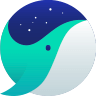
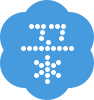

In [46]:
html=driver.page_source
html

In [47]:
url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
driver.get(url)

In [48]:
url="http://www.melon.com"
driver.get(url)

In [52]:
from bs4 import BeautifulSoup

In [53]:
#BeautifulSoup : html(웹) 문서의 구조, 내용 추출 도구
soup=BeautifulSoup(html,'html.parser')
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [54]:
soup.select('h1') #h1 태그 추출, 리스트 구조

[<h1> 우리동네시장</h1>]

In [55]:
soup.select('span')

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [56]:
soup.select('div')

[<div class="sale">
 <p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>
 </div>,
 <div class="prepare">
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>
 </div>]

In [57]:
soup.select('p')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [58]:
len(soup.select('p'))

2

In [59]:
soup.select('fruits1') # 빈 리스트, 검색되는 것이 없다

[]

In [60]:
soup.select('#fruits1') #id로 추출

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [62]:
soup.select('.fruits') #class로 추출

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [64]:
soup.select('span')[1].text

' 3000원 '

In [68]:
soup.select('span.price')[0].text.strip()

'3000원'

In [69]:
soup.select('span.name')

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [73]:
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [74]:
soup.select('#fruits1 > span.name') #fruits1 id안에 span.name이 있다

[<span class="name"> 바나나 </span>]

In [75]:
print(html)


<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>



In [76]:
soup.select('div.sale > #fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [78]:
soup.select('div.sale > #fruits1 > span.store')

[<span class="store"> 가나다상회 </span>]

In [79]:
soup.select('#fruits1 > span.store')

[<span class="store"> 가나다상회 </span>]

In [98]:
del html

In [104]:
del url

In [114]:
del soup

In [ ]:
#멜론 인기차트 스크래핑

In [115]:
url='http://www.melon.com/chart/index.htm'
driver.get(url)

In [118]:
html=driver.page_source
soup=BeautifulSoup(html, "html.parser")

In [139]:
songs=soup.select('tr')[1:]
songs

[<tr class="lst50" data-song-no="36713849" id="lst50">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="Love Lee 곡 선택" type="checkbox" value="36713849"/></div></td>
 <td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
 <!-- 차트순위 추가 -->
 <td><div class="wrap">
 <span class="rank_wrap" title="순위 동일">
 <span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
 <span class="none">0</span>
 </span>
 </div></td>
 <td><div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11309190');" title="Love Lee">
 <img alt="Love Lee - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/113/09/190/11309190_20230818161008_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>
 </div></td>
 <td><div class="wrap">
 <a class="btn button_icons type03 song_info" href="javas

In [140]:
len(songs)

100

In [142]:
song=songs[0]
song

<tr class="lst50" data-song-no="36713849" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Love Lee 곡 선택" type="checkbox" value="36713849"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11309190');" title="Love Lee">
<img alt="Love Lee - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/113/09/190/11309190_20230818161008_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.g

In [130]:
title=song.select('div.ellipsis.rank01 > span > a')[0].text
title

'Love Lee'

In [131]:
singer=song.select('div.ellipsis.rank02 > span > a')[0].text
singer

'AKMU (악뮤)'

In [209]:
song_data=[]
rank=1
for song in range(100):
    title=song.select('div.ellipsis.rank01 > span > a')[0].text
    singer=song.select('div.ellipsis.rank02 > span > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank+=1
    print(title, singer, sep=" | ")

AttributeError: 'int' object has no attribute 'select'

In [144]:
df=pd.DataFrame(song_data, columns=['서비스', '순위', '제목', '가수명'])
df

,서비스,순위,제목,가수명
0,Melon,1,Love Lee,AKMU (악뮤)
1,Melon,2,Seven (feat. Latto) - Clean Ver.,정국
2,Melon,3,Super Shy,NewJeans
3,Melon,4,"Smoke (Prod. Dynamicduo, Padi)",다이나믹 듀오
4,Melon,5,ETA,NewJeans
...,...,...,...,...
95,Melon,96,Yogurt Shake,NCT DREAM
96,Melon,97,TOMBOY,(여자)아이들
97,Melon,98,Get A Guitar,RIIZE
98,Melon,99,Allergy,(여자)아이들


In [145]:
df.to_excel('melon.xlsx', index=False)

In [ ]:
#while True:
#    time.sleep(60*60*24) #쉬었다가 동작
#    스크래핑 코드(멜론)
#    스크래핑 코드(벅스)
#    스크래핑 코드(기타...)
#    스크래핑 결과를 DB 테이블에 저장

In [ ]:
###유튜브 랭킹 데이터 수집###

In [171]:
browser=webdriver.Chrome()
url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)

In [172]:
html=browser.page_source
soup=BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="/css/default.css?ver=2022022" rel="stylesheet"/>
<link href="/css/bootstrap.css?ver=2022022" rel="stylesheet"/>
<link href="/css/nifty.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/themes/type-c/theme-well-red.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?2022022" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon.ico" rel="shortcut icon" type="image

In [180]:
channel_list=soup.select('tr')
len(channel_list[1:-1]) #0번 제외

100

In [181]:
channel=channel_list[1:-1]

In [182]:
channel[99]

<tr class="aos-init" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        99                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=7956"><img class="lazyload" data-src="https://yt3.ggpht.com/LPMctm8FbwAuirFV7HCSEh7WBLuoUNr7tt02AxRyyRUC4GeRSEa7NUiPahR0HfHVOhpXGd12Dg=s88-c-k-c0x00ffffff-no-rj" height="88" src="/img/img_bg.png" width="88"/></a></div>
<p class="info_rank">99</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EA%B2%8C%EC%9E%84">[게임]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=7956">
								
								EA SPORTS FC							</a>
<span>
<i class="fa fa-comment"></i>
								0							</span>
<i aria-hidden="true" class="fa fa-heart"></i> </h1>
<h2><span><a href="http

In [196]:
channel[0]

<tr class="aos-init" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BL

In [195]:
#카테고리 추출
channel[0].select('p.category')[0].text.strip() #카테고리가 하나라면 .category도 가능

'[음악/댄스/가수]'

In [204]:
#채널명 추출
channel[0].select('h1 > a')[0].text.strip()

'BLACKPINK'

In [ ]:
#구독자수, 뷰 개수, 동영상 개수 추출
#반복문으로 1위~100위까지 추출

In [ ]:
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4

In [207]:
for i in range(1, 8794//100):
    print('https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='+str(i))

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=11
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=12
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=13
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=14
https://youtube-rank.com/boar

In [ ]:
#오늘부터 주말까지 (벅스뮤직 차트 데이터 스크래핑)

In [146]:
from selenium import webdriver
driver=webdriver.Chrome()

In [147]:
url='https://music.bugs.co.kr/'
driver.get(url)

In [157]:
html=driver.page_source
soup=BeautifulSoup(html, "html.parser")
soup

<html class="chrome chrome116" lang="ko"><head>
<!-- bgsweb-www908 -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="노래추천, 음악추천, 플레이리스트, essential, 에센셜, 스트리밍, 스밍, 뮤직PD, 노래듣기, 음악다운로드, 페이코" name="keywords"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<script async="" crossorigin="anonymous" src="https://connect.facebook.net/ko_KR/sdk.js?hash=42b3d5372b9f34724fe259cad73da9e8"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script src="https://atm.acecounter.com/ac.js?tid=103005CR-30-A&amp;hsn=music.bugs.co.kr&amp;hrf=&amp;dvp=0&amp;tgp=&amp;tn1=&amp;tn2=0&amp;tn3=0&amp;tw1=&amp;tw2=&amp;tw3=&amp;tw4=&amp;tw5=&amp;tw6=&amp;tw7=&amp;rnd=1694673299906&amp;py=0"></script><script id="facebook-jssdk" src="//connect.facebook.com/ko_KR/sdk.js"></script><script type="text/javascript">
	if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/n

In [164]:
songs=soup.select('tr')[1:]
songs

[<tr albumid="20587839" artistid="65291" multiartist="Y" mvid="0" rowtype="track" trackid="6214823">
 <input name="_isStream" type="hidden" value="6214823"/>
 <input name="_isDown" type="hidden" value="6214823"/>
 <td class="check"><input buyminquality="T" disc_id="1" name="check" title="Smoke (Prod. Dynamicduo, Padi)" type="checkbox" value="6214823"/></td>
 <td>
 <div class="ranking">
 <strong>1</strong>
 <p class="change none"><em>0</em><span>변동없음</span></p>
 </div>
 </td>
 <td>
 <a class="thumbnail" href="https://music.bugs.co.kr/album/20587839?wl_ref=list_tr_07_chart" onclick="
 ">
 <span class="mask"></span>
 <img alt="스트릿 우먼 파이터2(SWF2) 계급미션 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/205878/20587839.jpg?version=20230906012219.0"/>
 </a>
 </td>
 <td>
 <a class="trackInfo" href="https://music.bugs.co.kr/track/6214823?wl_ref=list_tr_08_chart" onclick="
 ">곡정보</a>
 </td>
 <th scope="row">
 <p adult_yn="N" class="title">
 <a adultcheckval

In [166]:
song=songs[0]
song

<tr albumid="20587839" artistid="65291" multiartist="Y" mvid="0" rowtype="track" trackid="6214823">
<input name="_isStream" type="hidden" value="6214823"/>
<input name="_isDown" type="hidden" value="6214823"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="Smoke (Prod. Dynamicduo, Padi)" type="checkbox" value="6214823"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20587839?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="스트릿 우먼 파이터2(SWF2) 계급미션 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/205878/20587839.jpg?version=20230906012219.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/6214823?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" hre

In [170]:
song.select('a.artistTitle')

[<a class="artistTitle" href="https://music.bugs.co.kr/artist/65291?wl_ref=list_tr_10_chart" title="다이나믹 듀오">다이나믹 듀오</a>]